In [1]:
# basic stuff
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile

# geo stuff
import geopandas as gpd
from shapely.geometry import Point
# from ipyleaflet import (Map,
#     Marker,
#     TileLayer, ImageOverlay,
#     Polyline, Polygon, Rectangle, Circle, CircleMarker,
#     GeoJSON,
#     DrawControl
# )

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas
%load_ext autotime

# turn warnings off
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read and view GeoDataFrame
gdf = gpd.GeoDataFrame.from_file('new/Slum_banglore.shp')
gdf.head()

,AltMode,Base,Clamped,Extruded,FolderPath,Name,OID_,PopupInfo,Shape_Area,Shape_Leng,Snippet,SymbolID,geometry
0,0,0.0,-1,0,slums mala.kmz/slums mala,m2,0,None,1.912452e-08,0.000588,None,0,POLYGON Z ((77.76300594500003 13.0017349490000...
1,0,0.0,-1,0,slums mala.kmz/slums mala,m3,0,None,2.462954e-08,0.000614,None,0,POLYGON Z ((77.76389983500007 13.0010878540000...
2,0,0.0,-1,0,slums mala.kmz/slums mala,m4,0,None,1.259128e-08,0.000458,None,0,POLYGON Z ((77.76301924500007 13.0014918180000...
3,0,0.0,-1,0,slums mala.kmz/slums mala,m5,0,None,2.182265e-08,0.000564,None,0,POLYGON Z ((77.74995246400005 13.0024363600000...
4,0,0.0,-1,0,slums mala.kmz/slums mala,m6,0,None,1.673491e-07,0.002384,None,0,POLYGON Z ((77.72366174100006 12.9970105230000...


time: 228 ms


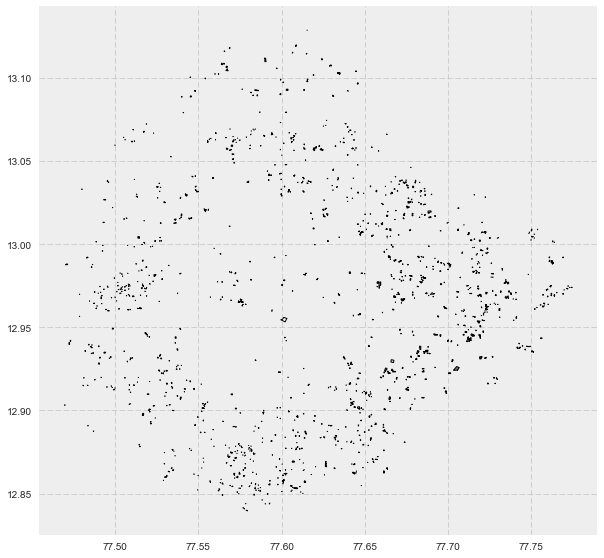

time: 7.6 s


In [3]:
# plot GeoDataFrame
gdf.plot()

In [4]:
def sim_users(n, p, f):

    # create datetime range
    today = datetime.today().strftime("%m/%d/%Y")
    rng = pd.date_range(today, periods=p, freq=f)

    # get min/max coorindates
    min_x, min_y = gdf['geometry'].bounds.ix[:,:2].min()
    max_x, max_y = gdf['geometry'].bounds.ix[:,2:].max()

    # iterate over time datetime range and create user list
    sim_user_list = []
    for ts in tqdm_notebook(rng, desc='Progress', leave=True):
        for j in xrange(n):
            x = uniform(min_x, max_x)
            y = uniform(min_y, max_y)
            point = Point(x, y)
            gender = randint(0, 1)
            religion = randint(0, 4)
            language = randint(0, 9)
            occupation = randint(0, 15)
            sim_user_list.append([ts, x, y, point, gender, religion, language, occupation])

    # return dataframe
    sim_user_df = pd.DataFrame(sim_user_list, columns=['datetime', 'x', 'y', 'point', 'gender', 'religion', 'language', 'occupation'])
    return sim_user_df

# simulate user data
sim_data = sim_users(1000, 24, 'H')
sim_data.head()


,datetime,x,y,point,gender,religion,language,occupation
0,2017-06-27,77.591863,13.045028,POINT (77.59186308679607 13.04502801377736),1,0,0,12
1,2017-06-27,77.540492,12.942739,POINT (77.54049202618927 12.94273939354664),0,2,3,12
2,2017-06-27,77.747480,13.061961,POINT (77.74747954127271 13.06196133984214),0,3,8,11
3,2017-06-27,77.646410,12.909098,POINT (77.6464096290167 12.90909822317232),0,3,2,8
4,2017-06-27,77.583095,12.986938,POINT (77.58309451635211 12.98693818089884),0,3,8,8


time: 856 ms


In [ ]:
# check if point(s) fall within known geometry - actual
sim_data['contains_1'] = sim_data['point'].map(lambda x: True if gdf.contains(x).any()==True else False)
sim_data.head()
sim_data.loc[sim_data['contains_1'] == True]